# Bài tập 3 - Thống kê mô tả

*(Thống kê máy tính và ứng dụng - ĐTTX Kì 2 2024-2025)*

MSSV: 21880248

Họ và tên: Nguyễn Đức Hiếu Nhân

In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Bộ dữ liệu `Auto MPG`

### Câu 1 (1 điểm)

1. Tìm hiểu bộ dữ liệu `Auto MPG` (https://archive.ics.uci.edu/dataset/9/auto+mpg)

1. Download tập tin dữ liệu `auto+mpg.zip` (https://archive.ics.uci.edu/static/public/9/auto+mpg.zip), lấy ra tập tin `auto-mpg.data` và nạp dữ liệu vào `DataFrame` tên là `auto_mpg`, kiểm tra thông tin của bảng dữ liệu nạp được

Lưu ý là bộ dữ liệu này có ô bị thiếu (đánh dấu bằng dấu ?).

In [193]:
# fetch dataset 
auto_names = ["mpg","cylinders","displacement" ,  "horsepower", "weight","acceleration","model_year","origin","car_name"]
auto_mpg = pd.read_csv(
    'auto-mpg.data',
    sep=r'\s+',
    names=auto_names,
    na_values='?'
)

auto_mpg


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


### Câu 2 (1 điểm)

Biến mpg (miles per gallon) là biến mục tiêu của bộ dữ liệu này. Biến mpg có kiểu dữ liệu là gì? Mô tả dữ liệu của biến mpg.

In [194]:
print(auto_mpg.mpg.dtype)
print(auto_mpg.mpg.describe)

float64
<bound method NDFrame.describe of 0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64>


### Câu 3 (1 điểm)

1. Vẽ biểu đồ quạt cho biết tần số các nhóm của origin.
1. Vẽ biểu đồ thanh cho biết tần số các nhóm của origin.
1. Vẽ biểu đồ thanh gom nhóm cho cylinders chia theo origin. 
1. Vẽ biểu đồ thanh xếp chồng cho cylinders chia theo origin.

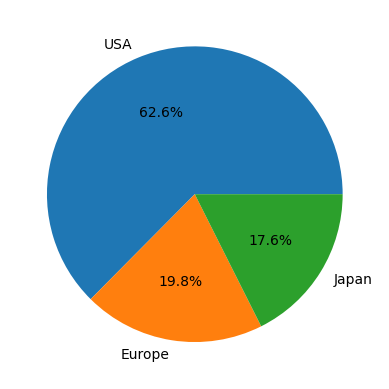

In [195]:
origin_count = auto_mpg['origin'].value_counts()
origin_labels = ["USA","Europe","Japan"]
plt.pie(origin_count,labels = origin_labels,autopct ="%1.1f%%")
plt.show()

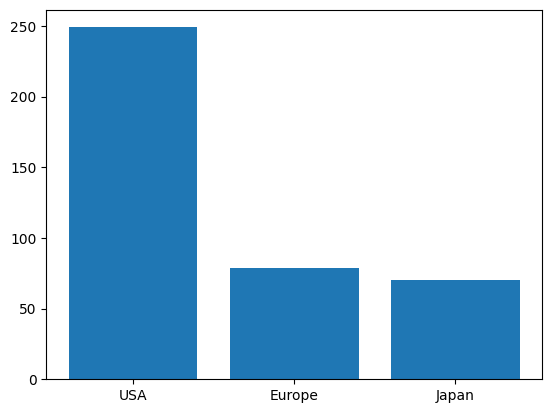

In [196]:
plt.bar(origin_labels,origin_count)
plt.show()

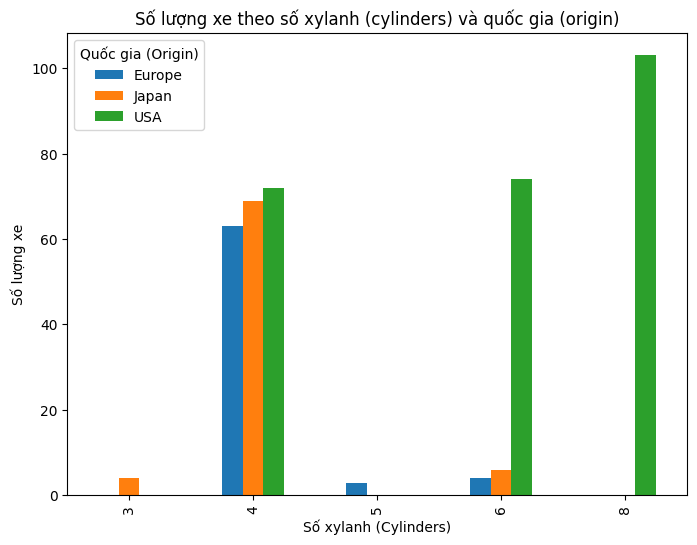

In [197]:
auto_mpg['origin'] = auto_mpg['origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
# Nhóm theo cylinders và origin, sau đó đếm số lượng
grouped = auto_mpg.groupby(['cylinders', 'origin']).size().unstack()

# Vẽ biểu đồ thanh
grouped.plot(kind='bar', figsize=(8,6))

plt.title('Số lượng xe theo số xylanh (cylinders) và quốc gia (origin)')
plt.xlabel('Số xylanh (Cylinders)')
plt.ylabel('Số lượng xe')
plt.legend(title='Quốc gia (Origin)')
plt.show()



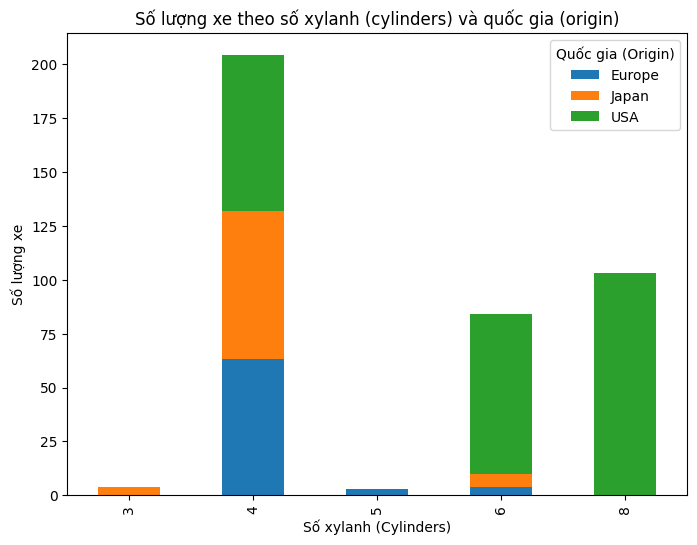

In [198]:
grouped.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title('Số lượng xe theo số xylanh (cylinders) và quốc gia (origin)')
plt.xlabel('Số xylanh (Cylinders)')
plt.ylabel('Số lượng xe')
plt.legend(title='Quốc gia (Origin)')
plt.show()

### Câu 4 (1 điểm)

1. Vẽ histogram cho weight với các khoảng chia đều.
1. Vẽ histogram cho weight với các khoảng chia theo phân vị: 20%, 40%, 50%, 60%, 80%, 100%.
1. Dùng histogram kiểm tra xem weight có ngoại lai hay không? 
1. Dùng boxplot kiểm tra xem weight có ngoại lai hay không?
1. Tính trung bình, trung vị của weight và so sánh.

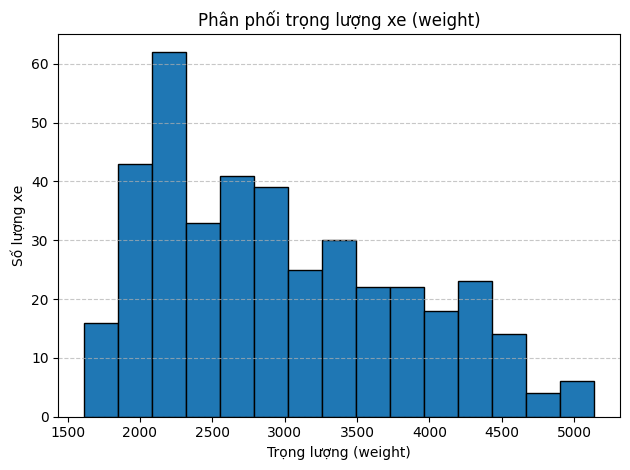

In [199]:
# Vẽ histogram cho cột weight
plt.hist(auto_mpg['weight'], bins=15, edgecolor='black')

# Trang trí biểu đồ
plt.title("Phân phối trọng lượng xe (weight)")
plt.xlabel("Trọng lượng (weight)")
plt.ylabel("Số lượng xe")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

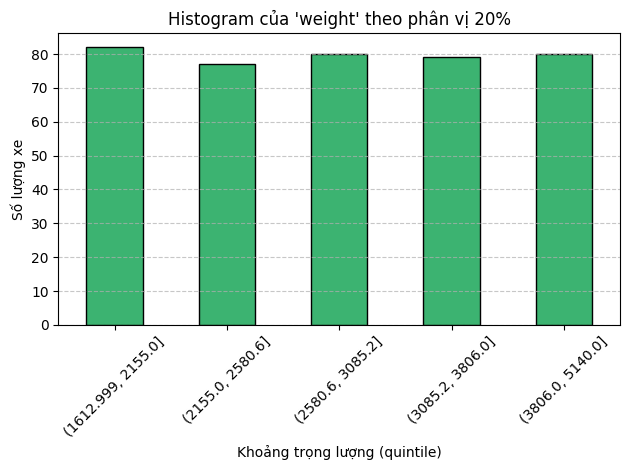

In [200]:
# Chia 'weight' thành 5 nhóm theo phân vị 20%
auto_mpg['weight_quintile'] = pd.qcut(auto_mpg['weight'], q=5)

# Đếm số lượng phần tử trong mỗi nhóm
freq = auto_mpg['weight_quintile'].value_counts().sort_index()

# Vẽ biểu đồ thanh (histogram theo phân vị)
freq.plot(kind='bar', color='mediumseagreen', edgecolor='black')

# Trang trí biểu đồ
plt.title("Histogram của 'weight' theo phân vị 20%")
plt.xlabel("Khoảng trọng lượng (quintile)")
plt.ylabel("Số lượng xe")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

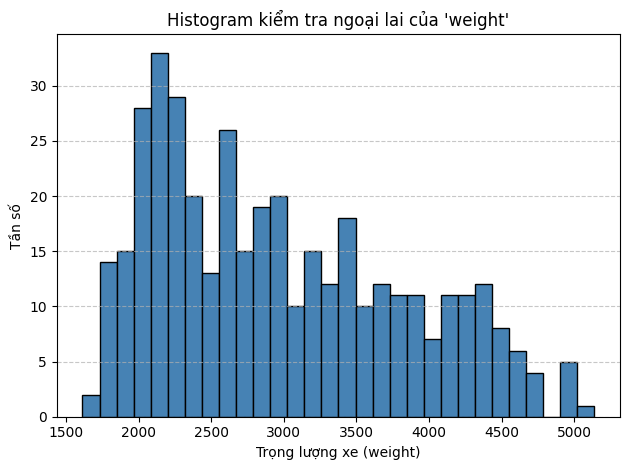

In [201]:
plt.hist(auto_mpg['weight'], bins=30, color='steelblue', edgecolor='black')

plt.title("Histogram kiểm tra ngoại lai của 'weight'")
plt.xlabel("Trọng lượng xe (weight)")
plt.ylabel("Tần số")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Có các cột đơn lẻ rất thấp ở phần đầu cuối --> có thể có ngoại lai

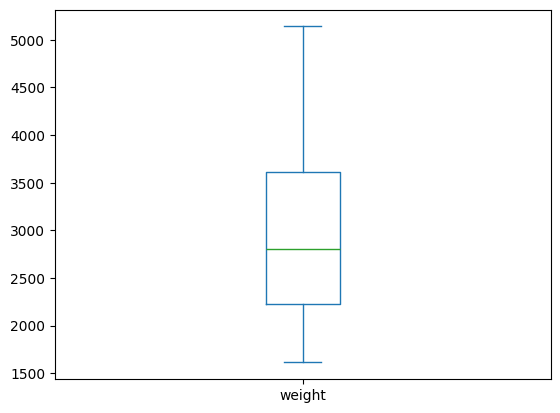

In [202]:
auto_mpg.weight.plot.box()
plt.show()

--> Không có ngoại lai

### Câu 5 (1 điểm)

1. Phân tích mpg theo origin.
1. Phân tích mpg theo weight. 

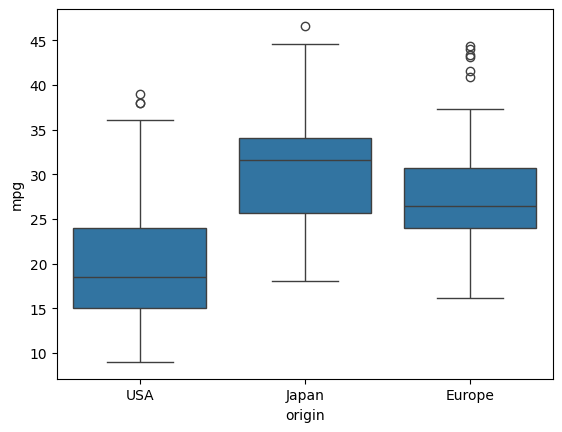

In [203]:
sns.boxplot(auto_mpg,x="origin",y="mpg")
plt.show()

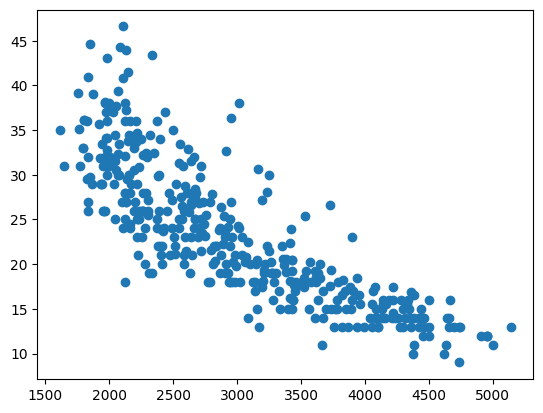

In [204]:
mpg_data = auto_mpg.mpg
weight_data = auto_mpg.weight

plt.scatter(weight_data,mpg_data)
plt.show()

### Câu 6 (1 điểm)

1. Dùng biến car name trích ra dữ liệu của 2 hãng xe có lượng xe nhiều nhất trong bộ dữ liệu
1. So sánh mpg của 2 hãng xe này. 

In [240]:
auto_mpg['brand'] = auto_mpg['car_name'].apply(lambda x: x.split()[0])
top_brand = auto_mpg["brand"].value_counts()
top2_brand = top_brand.head(2).index.tolist()
print(top2_brand)
data_top2 = auto_mpg[auto_mpg["hang_xe"].isin(top2_brand)]
print(data_top2)

['ford', 'chevrolet']
      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0  3504.0          12.0   
4    17.0          8         302.0       140.0  3449.0          10.5   
5    15.0          8         429.0       198.0  4341.0          10.0   
6    14.0          8         454.0       220.0  4354.0           9.0   
12   15.0          8         400.0       150.0  3761.0           9.5   
..    ...        ...           ...         ...     ...           ...   
373  24.0          4         140.0        92.0  2865.0          16.4   
389  22.0          6         232.0       112.0  2835.0          14.7   
392  27.0          4         151.0        90.0  2950.0          17.3   
393  27.0          4         140.0        86.0  2790.0          15.6   
396  28.0          4         120.0        79.0  2625.0          18.6   

     model_year origin                   car_name   weight_quintile  \
0            70    USA  chevrolet chevelle

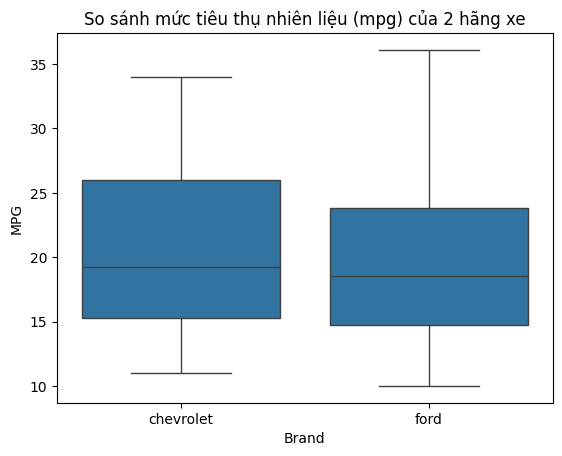

In [241]:
sns.boxplot(data=data_top2, x="brand", y="mpg")
plt.title("So sánh mức tiêu thụ nhiên liệu (mpg) của 2 hãng xe")
plt.xlabel("Brand")
plt.ylabel("MPG")
plt.show()

### Câu 7 (1 điểm)

Biến nào giúp dự đoán mpg tốt nhất?

## Bộ dữ liệu `Pop.Growth`

Tập tin `PopGrowth_WB.csv` chứa dữ liệu tỉ lệ tăng trưởng dân số (Population growth annual %) của các nước Đông Á - Thái Bình Dương (East Asia and Pacific) của 25 năm gần đây (1999 đến 2023) (nguồn World Bank: https://databank.worldbank.org/indicator/NY.GDP.PCAP.CD/1ff4a498/Popular-Indicators#advancedDownloadOptions).

### Câu 7 (1 điểm)

"Trích và mô tả" tỉ lệ tăng trưởng dân số của Việt Nam.

### Câu 8 (1 điểm)

"So sánh" tỉ lệ tăng trưởng dân số của Việt Nam với Thái Lan.

### Câu 9 (1 điểm)

Nước nào có mô hình tăng trưởng dân số giống Việt Nam nhất?